In [68]:
import pandas as pd
%matplotlib inline

# How to use this dataset

The CSV file for each day contains the scraped data of nearly every train (~99.5%+) ran on the NJ Transit track system that day, including Amtrak trains. Let's take a look at the file for Feb 9, 2018:

In [53]:
df_0209 = pd.read_csv('./csv/2018_02_09.csv') # use correct path here as necessary

In [54]:
df_0209.head()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type
0,4102,2018-02-09,1.0,Princeton,124.0,Princeton,124.0,2018-02-10 01:02:00,2018-02-10 01:02:05,Departed,Princeton Shuttle,NJ Transit
1,4102,2018-02-09,2.0,Princeton,124.0,Princeton Junction,125.0,2018-02-10 01:07:00,2018-02-10 01:07:00,Departed,Princeton Shuttle,NJ Transit
2,6655,2018-02-09,1.0,New York Penn Station,105.0,New York Penn Station,105.0,2018-02-09 18:20:00,2018-02-09 18:20:09,Departed,Morristown Line,NJ Transit
3,6655,2018-02-09,2.0,New York Penn Station,105.0,Secaucus Upper Lvl,38187.0,2018-02-09 18:30:00,2018-02-09 18:42:06,Departed,Morristown Line,NJ Transit
4,6655,2018-02-09,3.0,Secaucus Upper Lvl,38187.0,Newark Broad Street,106.0,2018-02-09 18:41:00,2018-02-09 19:04:02,Departed,Morristown Line,NJ Transit


Let's take a look at the first two rows to get a quick understanding of how the data represents a real train. Train #4102 is a train with two stops, originating out of Princeton station and terminating at Princeton Junction. Each stop in the train's journey is represented as one row in the dataset. The first row is "from" Princeton and "to" Princeton; this indicates the train's first departure; the second row is "from" Princeton and "to" Princeton Junction.
<br/>

## Data Dictionary

<table>
    <tr>
        <th>column</th>
        <th>type</th>
        <th>description</th>
    </tr>
    
    <tr>
        <td>train_id</td>
        <td>string</td>
        <td>Train number in the NJT or Amtrak system. These are unique on a daily basis and correspond to the same scheduled train across multiple days. If the train_id contains and "A", it is an Amtrak train.</td>
    </tr>
    
    <tr>
        <td>date</td>
        <td>string</td>
        <td>Date of operation according to the 27-hour NJ Transit schedule. e.g. trains originating between 02/09/18 4:00 to 02/09/18 27:00 (actually 02/10/18 3:00) are considered to run on 02/09/18. </td>
    </tr>
    
    <tr>
        <td>stop_sequence</td>
        <td>int</td>
        <td>Scheduled stop number (e.g. 1st stop, 2nd stop) for the stop in the current row. </td>
    </tr>
    
    <tr>
        <td>from</td>
        <td>string</td>
        <td>Station the train is traveling from for the stop in the current row.</td>
    </tr>
    
    <tr>
        <td>from_id</td>
        <td>int</td>
        <td>Station id for the "from" station.</td>
    </tr>
    
    <tr>
        <td>to</td>
        <td>string</td>
        <td>Station the train is arriving to for the stop in the current row.</td>
    </tr>
    
    <tr>
        <td>to_id</td>
        <td>int</td>
        <td>Station id for the "to" station.</td>
    </tr>
    
    <tr>
        <td>expected</td>
        <td>datetime</td>
        <td>If schedule data is available for this train and stop, the scheduled departure time out of the "to" stop</td>
    </tr>
    
    <tr>
        <td>time</td>
        <td>datetime</td>
        <td>If the status field is "Departed", the actual departure time out of the "to" stop. If the status field is "Cancelled", the time at which this stop was cancelled. If the status field is None, the estimated (but still accurate) departure time out of the "to" stop. </td>
    </tr>
    
    <tr>
        <td>status</td>
        <td>string</td>
        <td>Can take the values "Departed", "Cancelled", or None. "Departed" if stop was explicitly marked departed. "Cancelled" if stop was marked cancelled. None if the stop wasn't explicitly marked departed due to a terminated data stream for the train; estimated times used.</td>
    </tr>
    
    <tr>
        <td>line</td>
        <td>string</td>
        <td>The train line on NJ Transit or Amtrak. See <a href="https://www.njtransit.com/sf/sf_servlet.srv?hdnPageAction=TrainSchedulesMapTo">here</a></td>
    </tr>
    
    <tr>
        <td>type</td>
        <td>string</td>
        <td>Either "NJ Transit" or "Amtrak".</td>
    </tr>
    
    
        
</table>

## Getting Started

In [55]:
df_0209['expected'] = pd.to_datetime(df_0209['expected'])
df_0209['time'] = pd.to_datetime(df_0209['time'])

In [56]:
df_0209['delay']=(df_0209['time']-df_0209['expected']).dt.total_seconds() #calculate delay in seconds
df_0209['delay']=(df_0209['time']-df_0209['expected']).dt.total_seconds() #calculate delay in seconds

In [57]:
df_0209[df_0209['delay'] < 0].head()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
33,1226,2018-02-09,11.0,Secaucus Lower Lvl,38174.0,Hoboken,63.0,2018-02-09 19:39:00,2018-02-09 19:38:00,Departed,Main Line,NJ Transit,-60.0
34,6231,2018-02-09,1.0,New York Penn Station,105.0,New York Penn Station,105.0,2018-02-09 09:43:00,2018-02-09 09:42:20,Departed,Montclair-Boonton,NJ Transit,-40.0
46,6231,2018-02-09,13.0,Montclair Heights,89.0,Montclair State U,38081.0,2018-02-09 10:38:00,2018-02-09 10:36:00,Departed,Montclair-Boonton,NJ Transit,-120.0
58,0300,2018-02-09,12.0,Newark Broad Street,106.0,Hoboken,63.0,2018-02-09 06:11:00,2018-02-09 06:10:00,Departed,Morristown Line,NJ Transit,-60.0
77,6209,2018-02-09,1.0,New York Penn Station,105.0,New York Penn Station,105.0,2018-02-09 05:54:00,2018-02-09 05:53:09,Departed,Montclair-Boonton,NJ Transit,-51.0


Data is scraped every minute during a train's journey. Further, stations are marked departed or cancelled with 1-2 min of variability in the DV system. As a result, negative delay numbers are possible in the data and should be cleaned like so:

In [58]:
def clean_delay(sec):
    if sec < 0:
        return 0
    else:
        return sec

In [59]:
df_0209['delay'] = df_0209['delay'].apply(lambda x: clean_delay(x))/60.0 # clean delay and get delay in minutes

In [60]:
df_0209.head()

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
0,4102,2018-02-09,1.0,Princeton,124.0,Princeton,124.0,2018-02-10 01:02:00,2018-02-10 01:02:05,Departed,Princeton Shuttle,NJ Transit,0.083333
1,4102,2018-02-09,2.0,Princeton,124.0,Princeton Junction,125.0,2018-02-10 01:07:00,2018-02-10 01:07:00,Departed,Princeton Shuttle,NJ Transit,0.000000
2,6655,2018-02-09,1.0,New York Penn Station,105.0,New York Penn Station,105.0,2018-02-09 18:20:00,2018-02-09 18:20:09,Departed,Morristown Line,NJ Transit,0.150000
3,6655,2018-02-09,2.0,New York Penn Station,105.0,Secaucus Upper Lvl,38187.0,2018-02-09 18:30:00,2018-02-09 18:42:06,Departed,Morristown Line,NJ Transit,12.100000
4,6655,2018-02-09,3.0,Secaucus Upper Lvl,38187.0,Newark Broad Street,106.0,2018-02-09 18:41:00,2018-02-09 19:04:02,Departed,Morristown Line,NJ Transit,23.033333


## Delay Analysis of Trains into NY Penn

Now, let's try to view cumulative delays for a train. The cumulative delay for a train is simply the "delay" value for the last stop for the train:

In [61]:
cum_delay = df_0209.groupby('train_id').last()

Here are the five most delayed trains on the NJ Transit system on 2/9/18:

In [64]:
cum_delay.sort_values('delay', ascending=False).head()

,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
train_id,,,,,,,,,,,,
6299,2018-02-09,13.0,Montclair Heights,89.0,Montclair State U,38081.0,2018-02-10 00:33:00,2018-02-10 01:54:00,Departed,Montclair-Boonton,NJ Transit,81.0
0441,2018-02-09,17.0,Peapack,117.0,Gladstone,49.0,2018-02-09 20:34:00,2018-02-09 21:44:00,Departed,Gladstone Branch,NJ Transit,70.0
0439,2018-02-09,15.0,Peapack,117.0,Gladstone,49.0,2018-02-09 20:00:00,2018-02-09 21:09:00,Departed,Gladstone Branch,NJ Transit,69.0
0435,2018-02-09,16.0,Peapack,117.0,Gladstone,49.0,2018-02-09 19:24:00,2018-02-09 20:17:00,Departed,Gladstone Branch,NJ Transit,53.0
6201,2018-02-09,13.0,Montclair Heights,89.0,Montclair State U,38081.0,2018-02-10 01:24:00,2018-02-10 02:03:00,Departed,Montclair-Boonton,NJ Transit,39.0


Finally, let's look at delays for commuters going into New York Penn Station on 2/9/18 across all NJ Transit trains:

In [65]:
njt_nyp = cum_delay[(cum_delay['type']=="NJ Transit") & (cum_delay['to']=="New York Penn Station")]

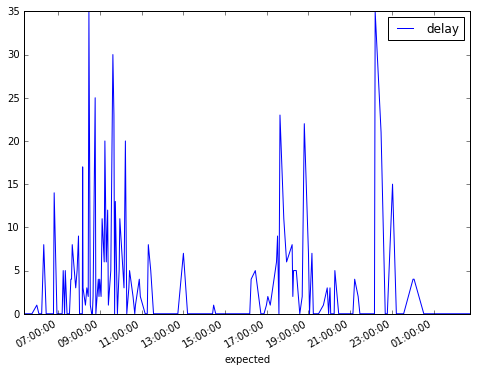

In [70]:
njt_nyp.plot(x="expected", y="delay", figsize=(8,6))

## Looking at Individual Trains

In [74]:
njt_nyp[njt_nyp['delay'] > 15].head()

,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
train_id,,,,,,,,,,,,
3830,2018-02-09,15.0,Secaucus Upper Lvl,38187.0,New York Penn Station,105.0,2018-02-09 09:37:00,2018-02-09 10:07:00,Departed,Northeast Corrdr,NJ Transit,30.0
3880,2018-02-09,14.0,Secaucus Upper Lvl,38187.0,New York Penn Station,105.0,2018-02-09 22:12:00,2018-02-09 22:47:00,Departed,Northeast Corrdr,NJ Transit,35.0
3896,2018-02-09,11.0,Secaucus Upper Lvl,38187.0,New York Penn Station,105.0,2018-02-09 17:38:00,2018-02-09 18:01:00,Departed,Northeast Corrdr,NJ Transit,23.0
3898,2018-02-09,7.0,Secaucus Upper Lvl,38187.0,New York Penn Station,105.0,2018-02-09 18:48:00,2018-02-09 19:10:00,Departed,Northeast Corrdr,NJ Transit,22.0
3922,2018-02-09,6.0,Secaucus Upper Lvl,38187.0,New York Penn Station,105.0,2018-02-09 08:10:00,2018-02-09 08:27:00,Departed,Northeast Corrdr,NJ Transit,17.0


In [77]:
df_0209[df_0209['train_id'] == "3922"]

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
6172,3922,2018-02-09,1.0,Trenton,148.0,Trenton,148.0,2018-02-09 06:57:00,2018-02-09 07:13:00,Departed,Northeast Corrdr,NJ Transit,16.000000
6173,3922,2018-02-09,2.0,Trenton,148.0,Hamilton,32905.0,2018-02-09 07:04:00,2018-02-09 07:15:05,Departed,Northeast Corrdr,NJ Transit,11.083333
6174,3922,2018-02-09,3.0,Hamilton,32905.0,Princeton Junction,125.0,2018-02-09 07:11:00,2018-02-09 07:21:03,Departed,Northeast Corrdr,NJ Transit,10.050000
6175,3922,2018-02-09,4.0,Princeton Junction,125.0,Newark Penn Station,107.0,2018-02-09 07:48:00,2018-02-09 08:07:06,Departed,Northeast Corrdr,NJ Transit,19.100000
6176,3922,2018-02-09,5.0,Newark Penn Station,107.0,Secaucus Upper Lvl,38187.0,2018-02-09 07:55:00,2018-02-09 08:15:07,Departed,Northeast Corrdr,NJ Transit,20.116667
6177,3922,2018-02-09,6.0,Secaucus Upper Lvl,38187.0,New York Penn Station,105.0,2018-02-09 08:10:00,2018-02-09 08:27:00,Departed,Northeast Corrdr,NJ Transit,17.000000


If data from several days is read into one csv, individual trains can be inspected by filter on both train_id and date.

## Amtrak Trains

In [79]:
amtrak = df_0209[df_0209['train_id'].str.contains("A")]['train_id'].unique()

In [82]:
amtrak

array(['A95', 'A92', 'A66', 'A2171', 'A655', 'A652', 'A2122', 'A56',
       'A600', 'A51', 'A2170', 'A609', 'A94', 'A2124', 'A653', 'A654',
       'A170', 'A184', 'A148', 'A183', 'A177', 'A141', 'A178', 'A176',
       'A185', 'A171', 'A125', 'A136', 'A138', 'A137', 'A130', 'A190',
       'A649', 'A20', 'A647', 'A640', 'A2155', 'A42', 'A89', 'A2164',
       'A80', 'A2163', 'A2100', 'A641', 'A646', 'A2107', 'A19', 'A648',
       'A2109', 'A86', 'A2165', 'A2153', 'A43', 'A2154', 'A651', 'A2110',
       'A2117', 'A656', 'A2128', 'A2121', 'A2126', 'A2119', 'A658', 'A91',
       'A2172', 'A65', 'A2175', 'A98', 'A650', 'A55', 'A97', 'A2173',
       'A90', 'A129', 'A111', 'A180', 'A174', 'A173', 'A187', 'A188',
       'A186', 'A172', 'A175', 'A193', 'A151', 'A133', 'A134', 'A2151',
       'A79', 'A83', 'A2160', 'A2167', 'A84', 'A2158', 'A643', 'A644',
       'A85', 'A2166', 'A2159', 'A2168', 'A2150', 'A2104', 'A645', 'A642',
       'A2103'], dtype=object)

In [85]:
df_0209[df_0209['train_id'] == "A642"]

,train_id,date,stop_sequence,from,from_id,to,to_id,expected,time,status,line,type,delay
10133,A642,2018-02-09,NaN,Philadelphia,1.0,Philadelphia,1.0,NaT,2018-02-09 08:08:12,Departed,Amtrak,Amtrak,NaN
10134,A642,2018-02-09,NaN,Philadelphia,1.0,Trenton,148.0,NaT,2018-02-09 08:45:07,Departed,Amtrak,Amtrak,NaN
10135,A642,2018-02-09,NaN,Trenton,148.0,Newark Penn Station,107.0,NaT,2018-02-09 09:18:10,Departed,Amtrak,Amtrak,NaN
10136,A642,2018-02-09,NaN,Newark Penn Station,107.0,New York Penn Station,105.0,NaT,2018-02-09 09:35:16,Departed,Amtrak,Amtrak,NaN


Note that there are null values here in the "expected" column. This is because Amtrak schedule data has not been incorporated into the dataset. While calculating Amtrak delays may currently be out of this dataset's scope, Amtrak data combined with NJT data can determine the total number of trains running at any given point.